# Problem Statement

    A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price

    The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:

* Which variables are significant in predicting the price of a house, and

* How well those variables describe the price of a house.

### Business Goal 

 

    You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

**Steps I'm Doing to Take**

* Loading and Understanding the data
* Data Cleaning
* Data Visualization
* Model Building 
* Model Evaluation

### Loading and Understanding the Data

While Building the Model Loading, It is initial steps to Understand flow of the Data

Here we do:

    Importing the important libraries
    Loading the Data
    Perform some Statistical operation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

# for model building
from sklearn.model_selection import train_test_split
#from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
import statsmodels.api as sm
# for model evaluation
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# for suppressing warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing the data for analysis
Dataset = pd.read_csv('/home/mohamed/Documents/Assignments/AustralianHousing/train.csv')
Dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


**Getting some Important Details of the Dataset**

In [3]:
#ifno option will explain some imporant details of the Dataset
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
#Getting some important Statistical Information
Dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


***Initial Steps***

While doing some initial steps in EDA, We can cleary see that some of imortant details

* Our Dataset contains total 1460 Rows and 81 Columns

* While checking the Dataset with info option ,we can clearly see that there is Numerous columns contains Null Values


* Descriptive Statistics

    In Descriptive Statistics we can Clearly See that there is N number of columns has outlier,if we leave outliers it will reduce our Performance




### Cleaning Data

Cleaning the data before building the model is mantatory because, it improves our data quality and increases overall productivity.

We dont need the Id column in dataset,because already have the Index by itself, it doesn't make sense to keeping this

In [5]:
#Dropping the id Columns
Dataset.drop(columns="Id",inplace=True)

In [6]:
#Checking the shape
Dataset.shape

(1460, 80)


**Checking the NaN Values in Dataset**

Here I'm going to check and Handling the NaN Values

In [7]:
#Checking The Nan
NaNValues=Dataset.isnull().sum()
NaNValues[NaNValues>0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

Checking the Null Values in Numerical and Categorical Data

**Categorical Data**

In [8]:
CategoricalData=Dataset.select_dtypes("object").columns
CategoricalNaN=Dataset[CategoricalData].isnull().sum()
(CategoricalNaN[CategoricalNaN>0]/len(Dataset))*100

Alley           93.767123
MasVnrType       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

Categorical columns contains huge NaN Values

But while i check in Data Description it clearly explains what is the Meaning of NaN for Feature Variable.

    The NaN in feature Variable Means there is No specific Feature present in Particular House

        Example:

            - For 'Alley', Nan means 'No alley'
            - For 'BsmtQual', 'BsmtCond', BsmtExposure, BsmtFinType1, BsmtFinType2 Nan means 'No basement'

Because of that dropping the Feature doesn't seems like a good idea,Instead of dropping I'm going to filled it with "No Feature"

In [9]:
# Imputing missing values with "Not_applicable"
Dataset[CategoricalData] = Dataset[CategoricalData].fillna(value='No_Feature', axis=1)

# Checking after imputation
Dataset[CategoricalData].isnull().sum()

MSZoning         0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
PoolQC           0
Fence            0
MiscFeature      0
SaleType         0
SaleCondition    0
dtype: int64

In [10]:
CategoricalData=Dataset.select_dtypes("object").columns
CategoricalNaN=Dataset[CategoricalData].isnull().sum()
(CategoricalNaN[CategoricalNaN>0]/len(Dataset))*100

Series([], dtype: float64)

**Checking and Handling the Numerical**

In [11]:
NumericalData=Dataset.select_dtypes(["int64","float64"]).columns
NumericalNaN=Dataset[NumericalData].isnull().sum()
#(NumericalNaN[CategoricalNaN>0]/len(Dataset))*100
NumericalNaN[NumericalNaN>0]/len(Dataset)*100

LotFrontage    17.739726
MasVnrArea      0.547945
GarageYrBlt     5.547945
dtype: float64

In [12]:
#Dropping the rows is better idea because the NaN is Only 1%
Dataset = Dataset[~Dataset['MasVnrType'].isnull()]

In [13]:
NumericalData=Dataset.select_dtypes(["int64","float64"]).columns
NumericalNaN=Dataset[NumericalData].isnull().sum()
#(NumericalNaN[CategoricalNaN>0]/len(Dataset))*100
NumericalNaN[NumericalNaN>0]/len(Dataset)*100

LotFrontage    17.739726
MasVnrArea      0.547945
GarageYrBlt     5.547945
dtype: float64

In [14]:
Dataset=Dataset[~(Dataset['MasVnrArea'].isnull())]

In [15]:
#Checking the null
Dataset.isnull().sum()[Dataset.isnull().sum()>0]

LotFrontage    257
GarageYrBlt     81
dtype: int64

In [16]:
Dataset['LotFrontage']=Dataset['LotFrontage'].fillna(Dataset['LotFrontage'].median())

In [17]:
#Checking the shape
Dataset.shape

(1452, 80)

**Summary**

While checking the NaN values on the Categorical Data I end up with Most of the values in categorical data is NaN, later a period while Checking the Data Description Then only realize NaN means No Feature

Because of that i filled the Null values with "No_feature"

**Checking and Handling the Outliers**

The Presence of outliers will reduce our model Performance,Detecting and Handling the Outliers is Mantatory while work on dataset

In [18]:
# Separating the Numerical and Categorical features for analysis
numeric_df = Dataset.select_dtypes(include=['int64', 'float64'])
categorical_df = Dataset.select_dtypes(include=['object'])

In [19]:
outliers_percentage={}

for feature in numeric_df.columns:
    IQR=numeric_df[feature].quantile(.75)-numeric_df[feature].quantile(.25)
    outliers_count=numeric_df[(numeric_df[feature]>(numeric_df[feature].quantile(.75)+1.5*IQR)) | (numeric_df[feature]<(numeric_df[feature].quantile(.25)-1.5*IQR))].shape[0]
    outliers_percentage[feature]=round(outliers_count/numeric_df.shape[0]*100,2)
    
outlier_df=pd.DataFrame({'Features':list(outliers_percentage.keys()),'Percentage':list(outliers_percentage.values())})
outlier_df.sort_values(by="Percentage", ascending=False)

,Features,Percentage
29,EnclosedPorch,14.26
9,BsmtFinSF2,11.50
4,OverallCond,8.54
31,ScreenPorch,7.99
1,LotFrontage,7.30
0,MSSubClass,7.09
7,MasVnrArea,6.61
17,BsmtHalfBath,5.65
28,OpenPorchSF,5.17
2,LotArea,4.61


In [20]:
for feature,percentage in outliers_percentage.items():
    if feature!='SalePrice':
        IQR = Dataset[feature].quantile(.75) - Dataset[feature].quantile(.25) 
        max_value = Dataset[feature].quantile(.75)+1.5*IQR
        min_value = Dataset[feature].quantile(.25)-1.5*IQR
        Dataset[feature][Dataset[feature] > max_value] = max_value
        Dataset[feature][Dataset[feature] < min_value ] = min_value

In [21]:
# Checking the dataset after reassigning minmum and maximum values

Dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1452.0,55.127410,37.526939,20.000,20.00,50.0,70.00,145.000
LotFrontage,1452.0,69.070248,17.212867,31.500,60.00,69.0,79.00,107.500
LotArea,1452.0,9644.180871,3594.590188,1446.875,7538.75,9478.5,11600.00,17691.875
OverallQual,1452.0,6.094353,1.376697,2.000,5.00,6.0,7.00,10.000
OverallCond,1452.0,5.546832,0.964145,3.500,5.00,5.0,6.00,7.500
YearBuilt,1452.0,1971.148072,30.098863,1885.000,1954.00,1972.0,2000.00,2010.000
YearRemodAdd,1452.0,1984.775482,20.652466,1950.000,1966.00,1993.0,2004.00,2010.000
MasVnrArea,1452.0,90.192149,134.925253,0.000,0.00,0.0,166.00,415.000
BsmtFinSF1,1452.0,438.238292,432.082804,0.000,0.00,381.0,706.50,1766.250
BsmtFinSF2,1452.0,0.000000,0.000000,0.000,0.00,0.0,0.00,0.000


**Summary**
* Majority of the numeric features  have outliers
* Dropping the Rows of outliers will cause loss of information.
* Because of that i handled the Outliers with **Capping and Flooring technique**  ***[25th percentile - 1.5 * IQR, 75th percentile + 1.5 * IQR]***

* Target column 'SalePrice' is excluded in this

#### Data Visualization

Visualizing the Data which help us to understand the Flow of Data and Skewness Etc

**Checking the Co-relation**

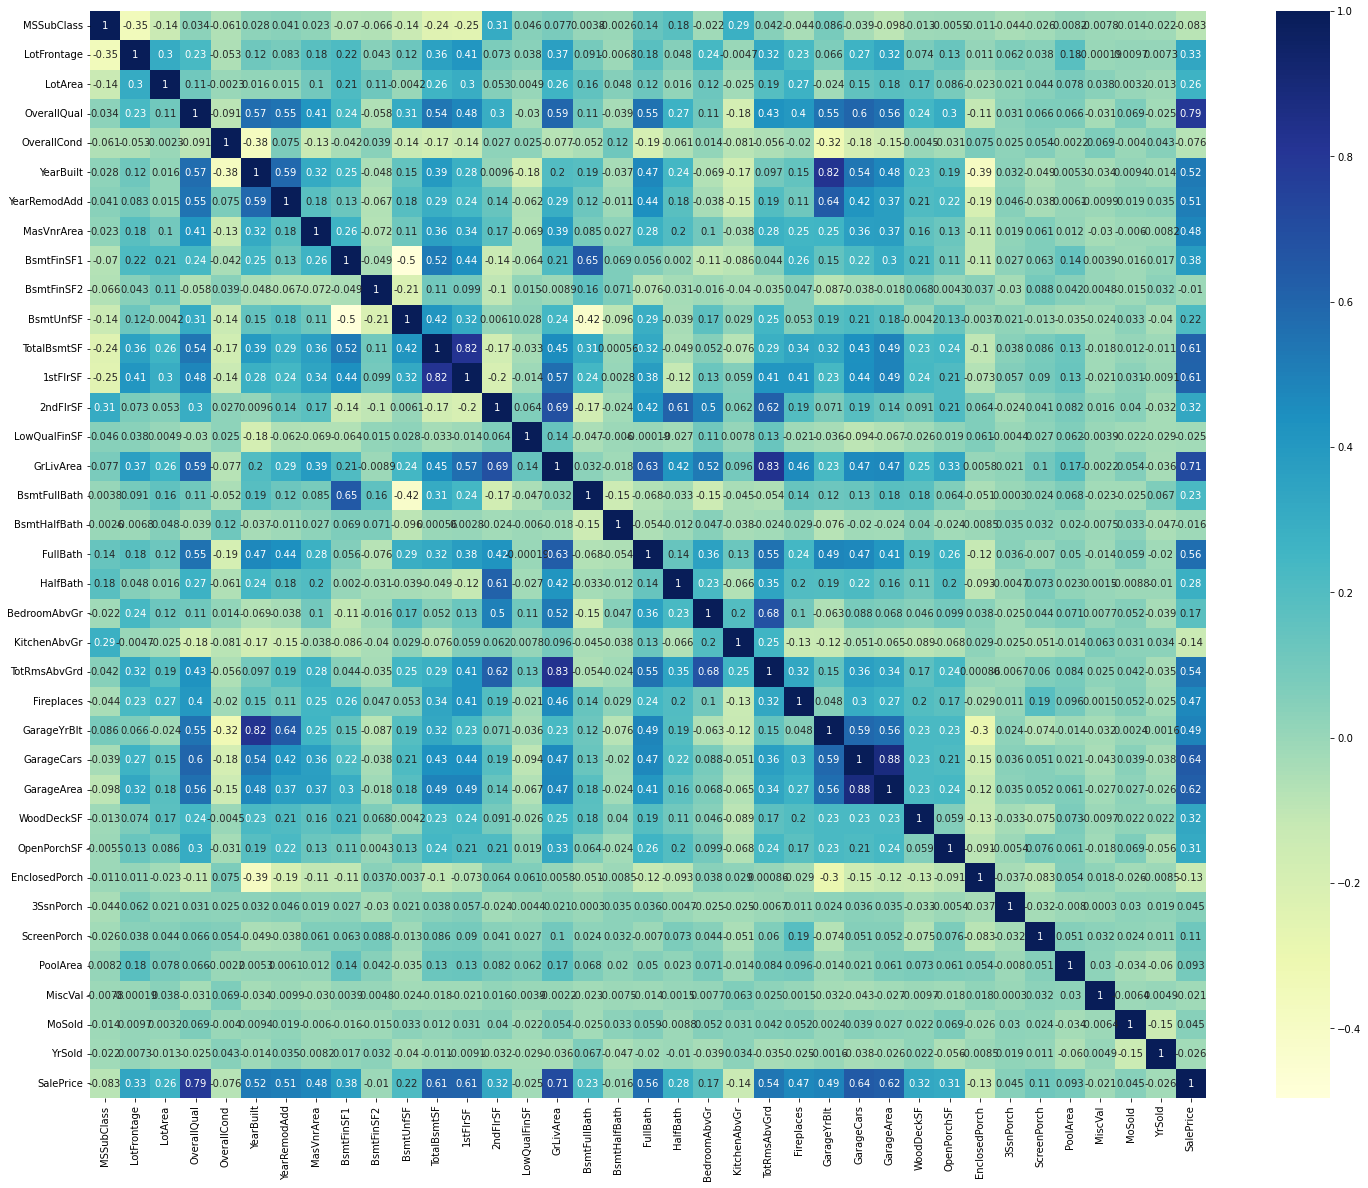

In [22]:
plt.figure(figsize=(25,20))
sb.heatmap(numeric_df.corr(),annot=True,cmap="YlGnBu")
plt.show()

**Summary**
We can't clearly see that most of the Highly co-relate Varible Because Number variables is high,but i found some of the Highly co-relate variables:
Those Are:

* GarageCars and GarageArea (0.88)
* GarageYrBlt and YearBuilt (0.83)
* TotRmsAbvGrd and GrLivArea (0.83)
* TotalBsmtSF and 1stflrSF (0.82)

So,Dropping those Variables is better Idea

Here I'm Going to drop which is less corelate with Target Variables

In [23]:
#Dropping the Highly corelate Variable
Dataset.drop(columns=['GarageCars', 'GarageYrBlt', 'GrLivArea', 'TotalBsmtSF'],inplace=True)

While Checking the Number of Numerical columns it will be high, so instead of checking every numerical columns try to check few which i'm thinking good numeriacl predictor

<Figure size 720x360 with 0 Axes>

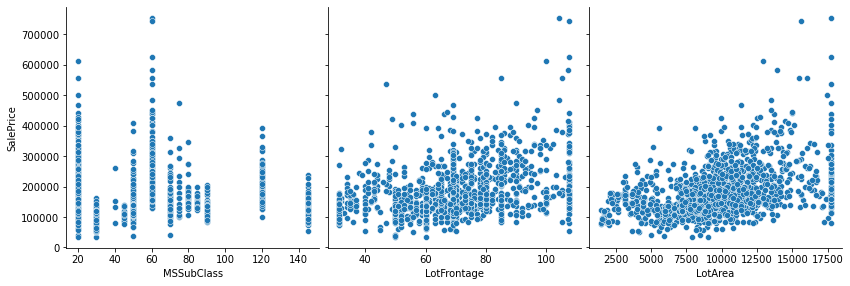

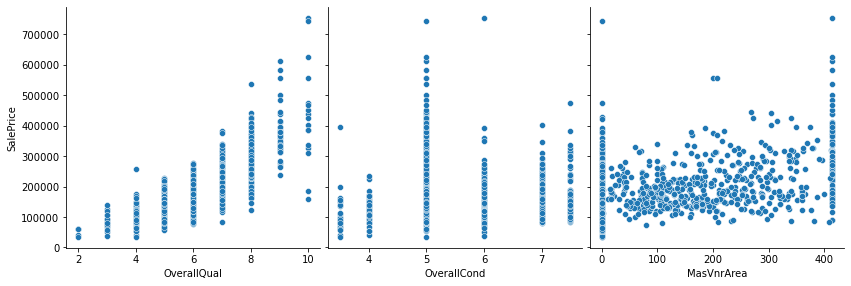

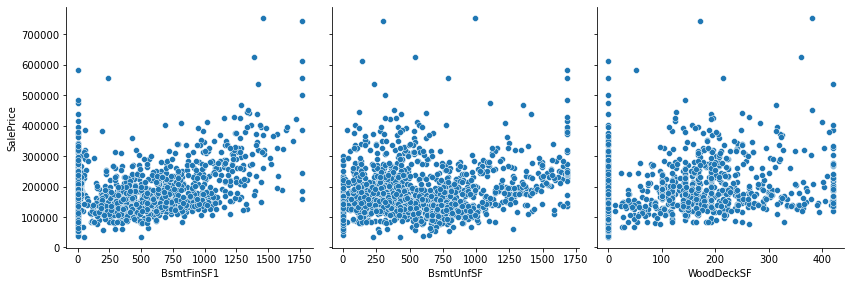

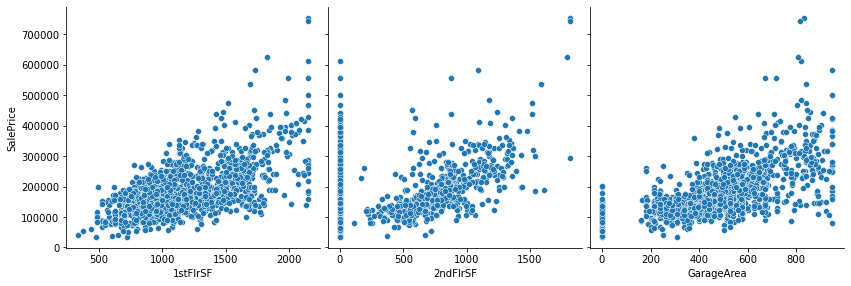

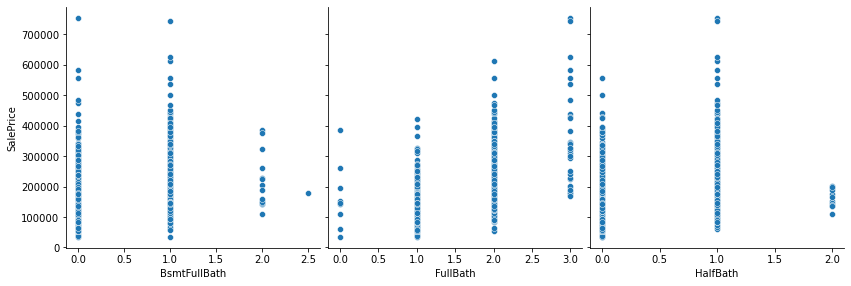

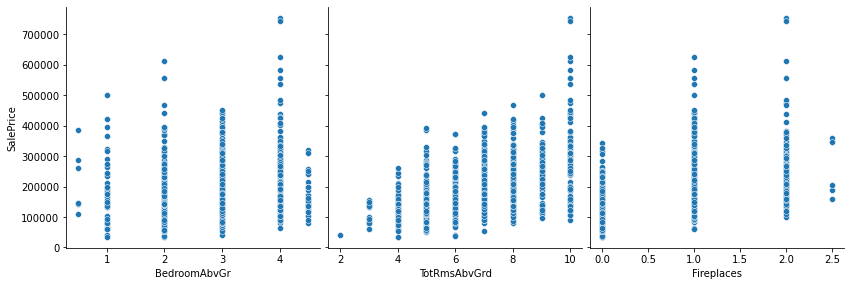

In [24]:
#Plotting the Numerical datas by Scatter Plot
plt.figure(figsize=(10,5))
sb.pairplot(Dataset, x_vars=['MSSubClass','LotFrontage','LotArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sb.pairplot(Dataset, x_vars=['OverallQual', 'OverallCond','MasVnrArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sb.pairplot(Dataset, x_vars=['BsmtFinSF1', 'BsmtUnfSF','WoodDeckSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sb.pairplot(Dataset, x_vars=['1stFlrSF','2ndFlrSF','GarageArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sb.pairplot(Dataset, x_vars=['BsmtFullBath','FullBath', 'HalfBath'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sb.pairplot(Dataset, x_vars=['BedroomAbvGr','TotRmsAbvGrd', 'Fireplaces'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
#sb.pairplot(Dataset, x_vars=['GarageArea', 'WoodDeckSF', 'OpenPorchSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')



**Summary**

* BedroomAbvGr,TotRmsAbvGrd,Fireplace,'MSSubClass','OverallQual', 'OverallCond','BsmtFullBath','FullBath', 'HalfBath' all are seems to be a Discrete Variable

* TotRmsAbvGrd,Fireplace,FullBath all are showing some linear trend

* But all of those Discrete Values OverallQual show huge linear trend this is better prective Variable I guess

* 'LotFrontage','LotArea','1stFlrSF','2ndFlrSF','GarageArea'GarageArea are showing some Trend

In [25]:
Dataset.describe(percentiles=[0.25,0.50,0.75,0.90,0.997]).transpose()

,count,mean,std,min,25%,50%,75%,90%,99.7%,max
MSSubClass,1452.0,55.127410,37.526939,20.000,20.00,50.0,70.0,120.0,145.0000,145.000
LotFrontage,1452.0,69.070248,17.212867,31.500,60.00,69.0,79.0,92.0,107.5000,107.500
LotArea,1452.0,9644.180871,3594.590188,1446.875,7538.75,9478.5,11600.0,14373.9,17691.8750,17691.875
OverallQual,1452.0,6.094353,1.376697,2.000,5.00,6.0,7.0,8.0,10.0000,10.000
OverallCond,1452.0,5.546832,0.964145,3.500,5.00,5.0,6.0,7.0,7.5000,7.500
YearBuilt,1452.0,1971.148072,30.098863,1885.000,1954.00,1972.0,2000.0,2006.0,2009.0000,2010.000
YearRemodAdd,1452.0,1984.775482,20.652466,1950.000,1966.00,1993.0,2004.0,2006.0,2010.0000,2010.000
MasVnrArea,1452.0,90.192149,134.925253,0.000,0.00,0.0,166.0,335.0,415.0000,415.000
BsmtFinSF1,1452.0,438.238292,432.082804,0.000,0.00,381.0,706.5,1063.5,1766.2500,1766.250
BsmtFinSF2,1452.0,0.000000,0.000000,0.000,0.00,0.0,0.0,0.0,0.0000,0.000


While Checking the Data Description again I can clearly see that some of variables are 0 which is mostly happend Because of Handling the Outliers

We dont have any use of that keeping that with us

In [26]:
#Dropping the single Valued Columns
Dataset.drop(columns=['LowQualFinSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',"KitchenAbvGr","BsmtHalfBath"],inplace=True)

In [27]:
Dataset.describe(percentiles=[0.25,0.50,0.75,0.90,0.997]).transpose()

,count,mean,std,min,25%,50%,75%,90%,99.7%,max
MSSubClass,1452.0,55.127410,37.526939,20.000,20.00,50.0,70.0,120.0,145.0000,145.000
LotFrontage,1452.0,69.070248,17.212867,31.500,60.00,69.0,79.0,92.0,107.5000,107.500
LotArea,1452.0,9644.180871,3594.590188,1446.875,7538.75,9478.5,11600.0,14373.9,17691.8750,17691.875
OverallQual,1452.0,6.094353,1.376697,2.000,5.00,6.0,7.0,8.0,10.0000,10.000
OverallCond,1452.0,5.546832,0.964145,3.500,5.00,5.0,6.0,7.0,7.5000,7.500
YearBuilt,1452.0,1971.148072,30.098863,1885.000,1954.00,1972.0,2000.0,2006.0,2009.0000,2010.000
YearRemodAdd,1452.0,1984.775482,20.652466,1950.000,1966.00,1993.0,2004.0,2006.0,2010.0000,2010.000
MasVnrArea,1452.0,90.192149,134.925253,0.000,0.00,0.0,166.0,335.0,415.0000,415.000
BsmtFinSF1,1452.0,438.238292,432.082804,0.000,0.00,381.0,706.5,1063.5,1766.2500,1766.250
BsmtFinSF2,1452.0,0.000000,0.000000,0.000,0.00,0.0,0.0,0.0,0.0000,0.000


After Dropping the Single Valued Columns Then our Numerical Data is Looks Fine

In [28]:
#Checking the shape of Remaing columns
Dataset.shape

(1452, 68)

**Univariate Analysis**

Analyze the Distribution of Important Variables We Have

In [29]:
#Getting Numerical Columns
NumericalData=Dataset.select_dtypes(["int64","float64"])

In [30]:
NumericalData.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 'BsmtFullBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

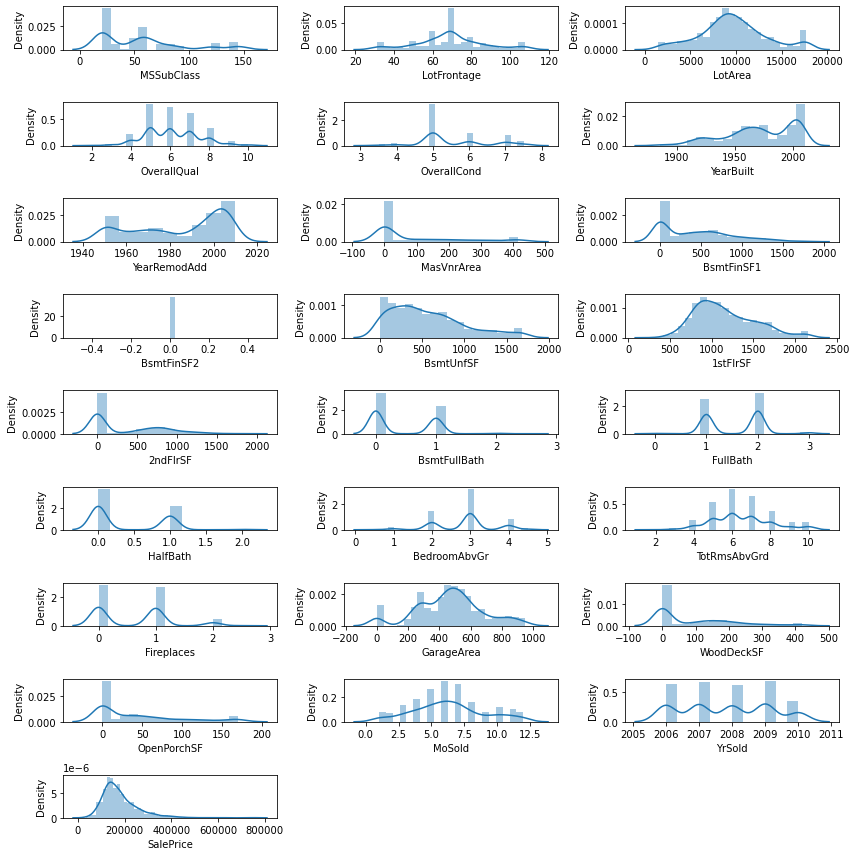

In [31]:
fig=plt.subplots(figsize=(12, 12))

for i, feature in enumerate(NumericalData.columns):
    plt.subplot(9, 3, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sb.distplot(Dataset[feature])
    plt.tight_layout()

While seeing the Normal distribution curves we can say that

SalePrice[Target Price] is right skewed,we need to handle this

1stFlrSF and BsmtUnfSF are normally distributed But little right skewness and Std also high

Others are discrete and Better Performer also

**Analyzing Numerical Features with Discrete Values**

In [32]:
Dataset[['OverallQual','OverallCond','MoSold','YrSold','BsmtFullBath','FullBath','HalfBath','BedroomAbvGr','TotRmsAbvGrd','Fireplaces','YearBuilt','YearRemodAdd']]

,OverallQual,OverallCond,MoSold,YrSold,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,YearBuilt,YearRemodAdd
0,7,5.0,2,2008,1.0,2,1,3.0,8,0.0,2003,2003
1,6,7.5,5,2007,0.0,2,0,3.0,6,1.0,1976,1976
2,7,5.0,9,2008,1.0,2,1,3.0,6,1.0,2001,2002
3,7,5.0,2,2006,1.0,1,0,3.0,7,1.0,1915,1970
4,8,5.0,12,2008,1.0,2,1,4.0,9,1.0,2000,2000
...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,5.0,8,2007,0.0,2,1,3.0,7,1.0,1999,2000
1456,6,6.0,2,2010,1.0,2,0,3.0,7,2.0,1978,1988
1457,7,7.5,5,2010,0.0,2,0,4.0,9,2.0,1941,2006
1458,5,6.0,4,2010,1.0,1,0,2.0,5,0.0,1950,1996


Visualize the Important Discreate Variablesl with Target Variable

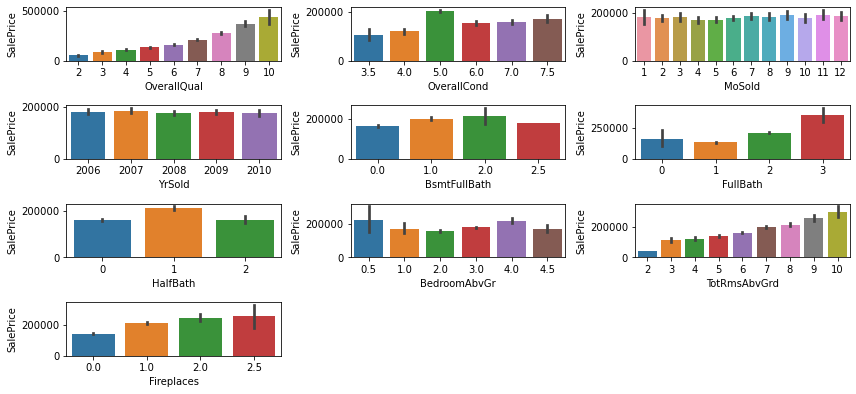

In [33]:
discreteColumns=['OverallQual','OverallCond','MoSold','YrSold','BsmtFullBath','FullBath','HalfBath','BedroomAbvGr','TotRmsAbvGrd','Fireplaces']
fig=plt.subplots(figsize=(12, 12))

for i, feature in enumerate(discreteColumns):
    plt.subplot(9, 3, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sb.barplot(Dataset[feature], Dataset['SalePrice'])
    plt.tight_layout()

**Summary**


* 'OverallQual' : More the rating of this feature, more the SalePrice (target variable)

* 'OverallCond' : SalePrice is highest for rating 5

* 'MoSold' and 'YrSold': SalePrice does not show a strong trend depending on month and year on which realty is sold

* 'FullBath' = 2 and 'HalfBath' = 1 have highest SalePrice 

* 'TotRmsAbvGrd' : More the number of total rooms above grade more the Sale Price


We can Derive New Metrics with Year columns, which will help in future for our analysis

In [34]:
Dataset[['YearBuilt','YearRemodAdd', 'YrSold']].describe()

,YearBuilt,YearRemodAdd,YrSold
count,1452.000000,1452.000000,1452.000000
mean,1971.148072,1984.775482,2007.815427
std,30.098863,20.652466,1.328927
min,1885.000000,1950.000000,2006.000000
25%,1954.000000,1966.000000,2007.000000
50%,1972.000000,1993.000000,2008.000000
75%,2000.000000,2004.000000,2009.000000
max,2010.000000,2010.000000,2010.000000


In [35]:
# Converting the year related features into number of years

for feature in ['YearBuilt','YearRemodAdd', 'YrSold']:
    Dataset[feature] = 2022 - Dataset[feature]

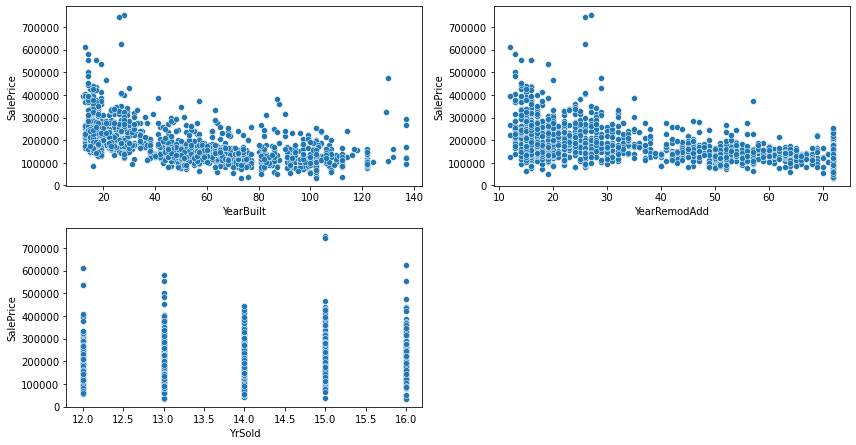

In [36]:
fig=plt.subplots(figsize=(12, 12))

for i, feature in enumerate(['YearBuilt','YearRemodAdd', 'YrSold']):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sb.scatterplot(Dataset[feature], Dataset['SalePrice'])
    plt.tight_layout()

**Summary**

Recently build house has better chance to get better sale price

Recently remodelled houses (lower value of YearRemodAdd) have higher SalePrice 

Apart from this Nothing Interesting on Years and SalePrice

In [37]:
Dataset.isnull().sum()[Dataset.isnull().sum()>0]

Series([], dtype: int64)

In [38]:
Dataset.shape

(1452, 68)

***Analyzing Ordered Features***

In our Dataset There is some Variables those are Ordered in nature So we go back and analyze the Ordered Data First

In [39]:
def Plot(feature_list):
    fig=plt.subplots(figsize=(20, 16))
    for i, feature in enumerate(feature_list):
        plt.subplot(4, 2, i+1)
        plt.subplots_adjust(hspace = 2.0)
        sb.barplot(Dataset['SalePrice'], Dataset[feature])
        plt.tight_layout()

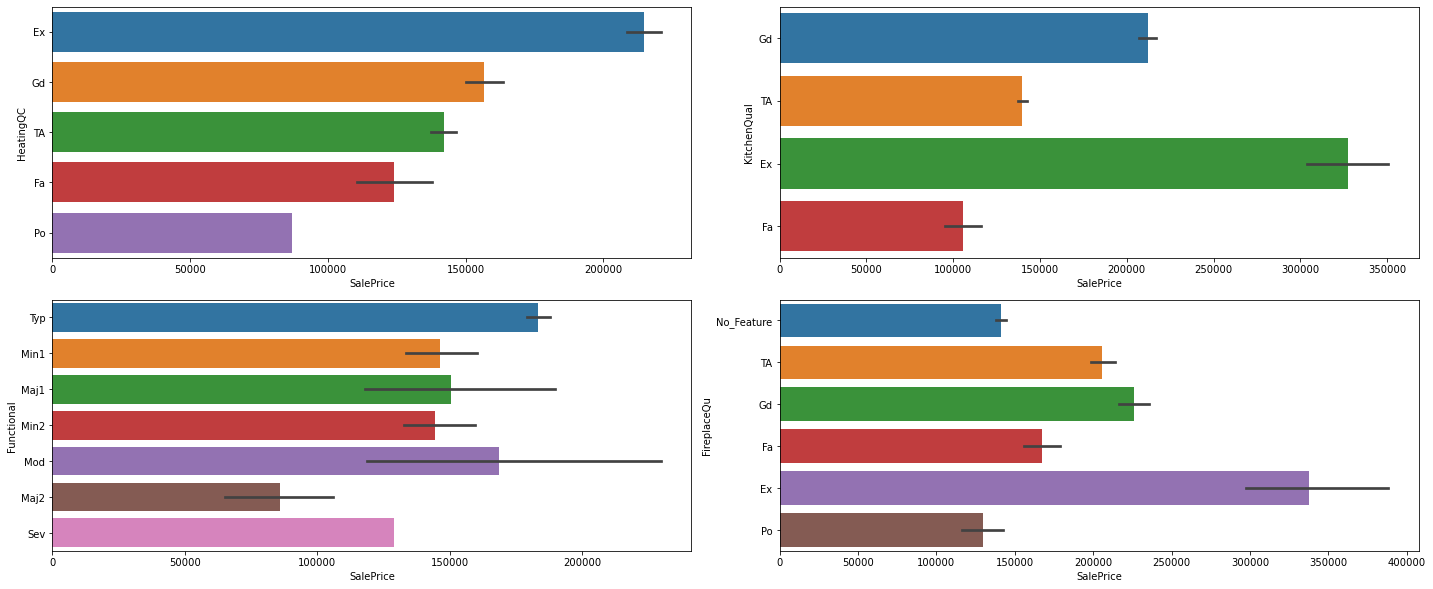

In [40]:
FireFeature=['HeatingQC', 'KitchenQual','Functional','FireplaceQu']
Plot(FireFeature)

**Summary:**

Houses having excellent heating quality and kitchen quality have the highest SalePrice

Fire Category Play Important role Un Sale Price

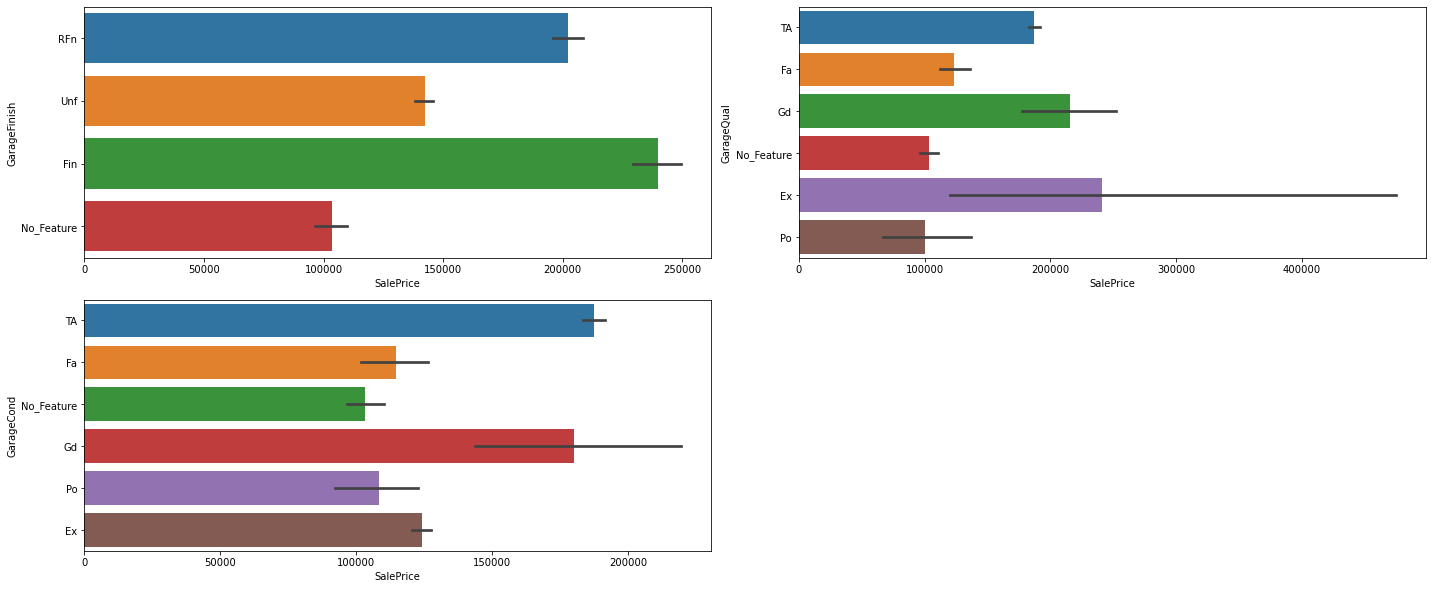

In [41]:
garage = ['GarageFinish', 'GarageQual','GarageCond']

Plot(garage)

**Summary**

There are very few houses with excellect condition of garage.

SalePrice is highest where garage is finished.

The range of SalePrice is widest for Typical/Average Garage quality and condition.

There are very few houses with excellect condition of garage.

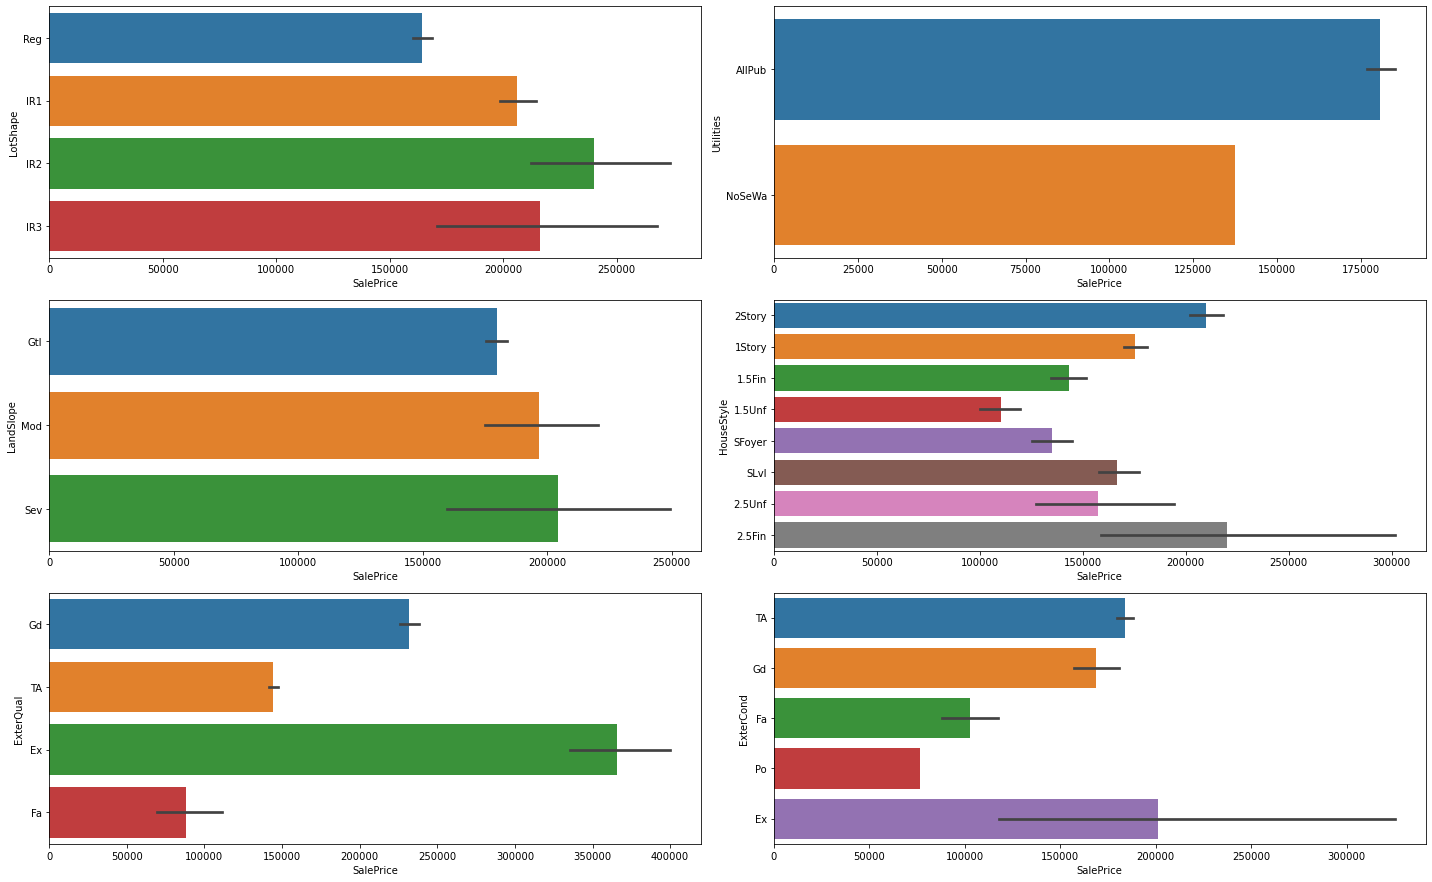

In [42]:
Feature=['LotShape', 'Utilities', 'LandSlope', 'HouseStyle', 'ExterQual', 'ExterCond']

Plot(Feature)

**Summary**
- 'LotShape' : Slightly irregular LotShape have the highest SalePrice
- 'Utilities' : Most of the houses in the dataset have all the public utilities
- 'LandSlope' : Houses at severe land slope have lowest SalePrice
- 'HouseStyle' : 2 storied houses have the highest SalePrice
- 'ExterQual' : Houses with Excellent quality of material on the exterior have the highest SalePrice
- 'ExterCond' : Houses with Excellent condition of material on the exterior have the highest SalePrice

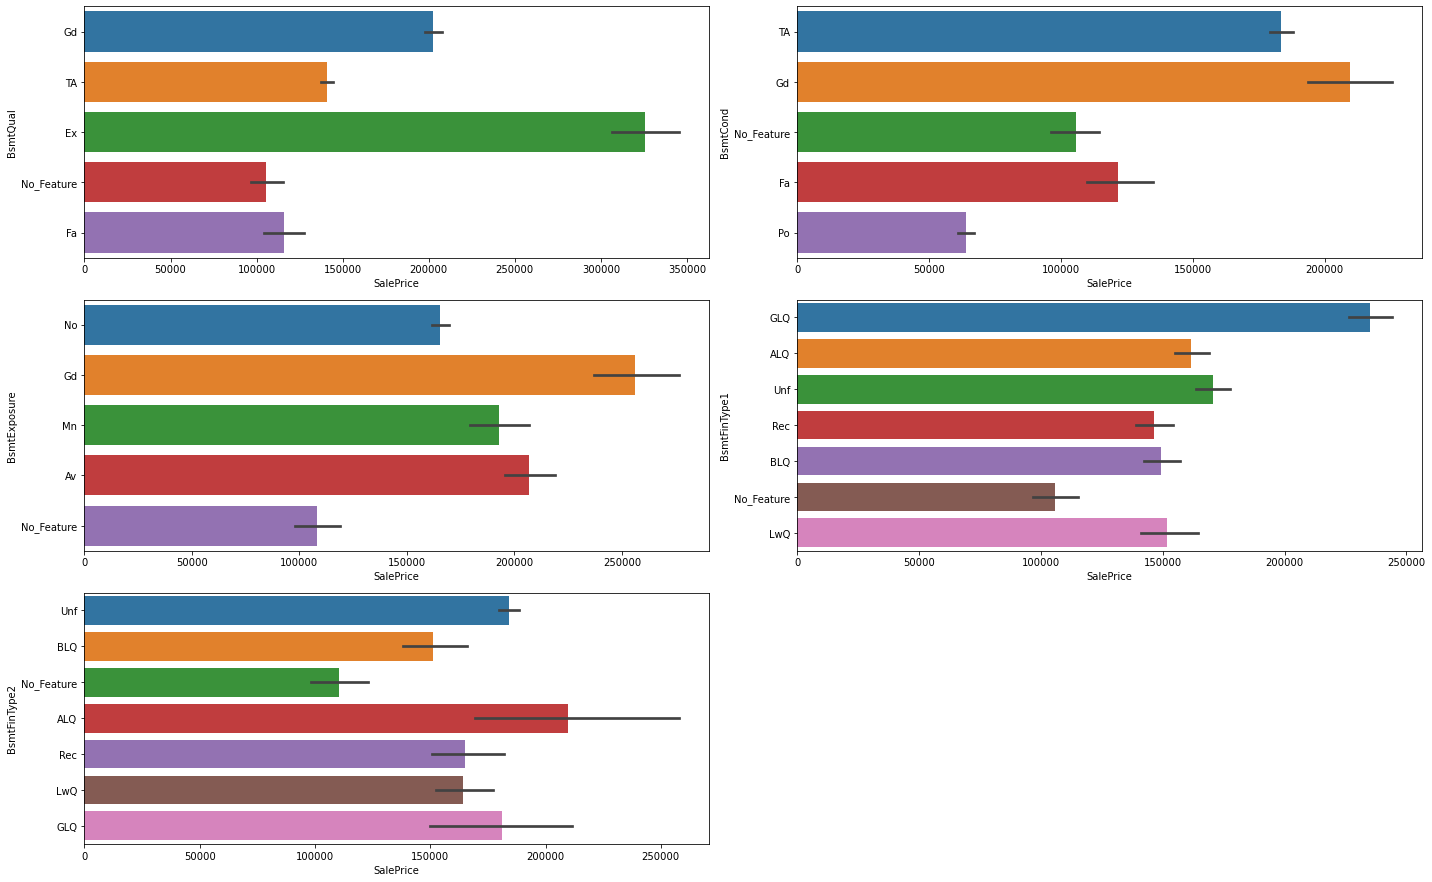

In [43]:
basement_features = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']

Plot(basement_features)

**Summary**

Houses with excellent quality basement have the highest SalePrice

A lot of houses have unfinished basment or no basement (label = No_Feature)

**Analysing Some Important Unordered Categorical Variable**

Unorderd Category Means we cannot order one by one

In [44]:
Dataset['MasVnrType']

0       BrkFace
1          None
2       BrkFace
3          None
4       BrkFace
         ...   
1455       None
1456      Stone
1457       None
1458       None
1459       None
Name: MasVnrType, Length: 1452, dtype: object

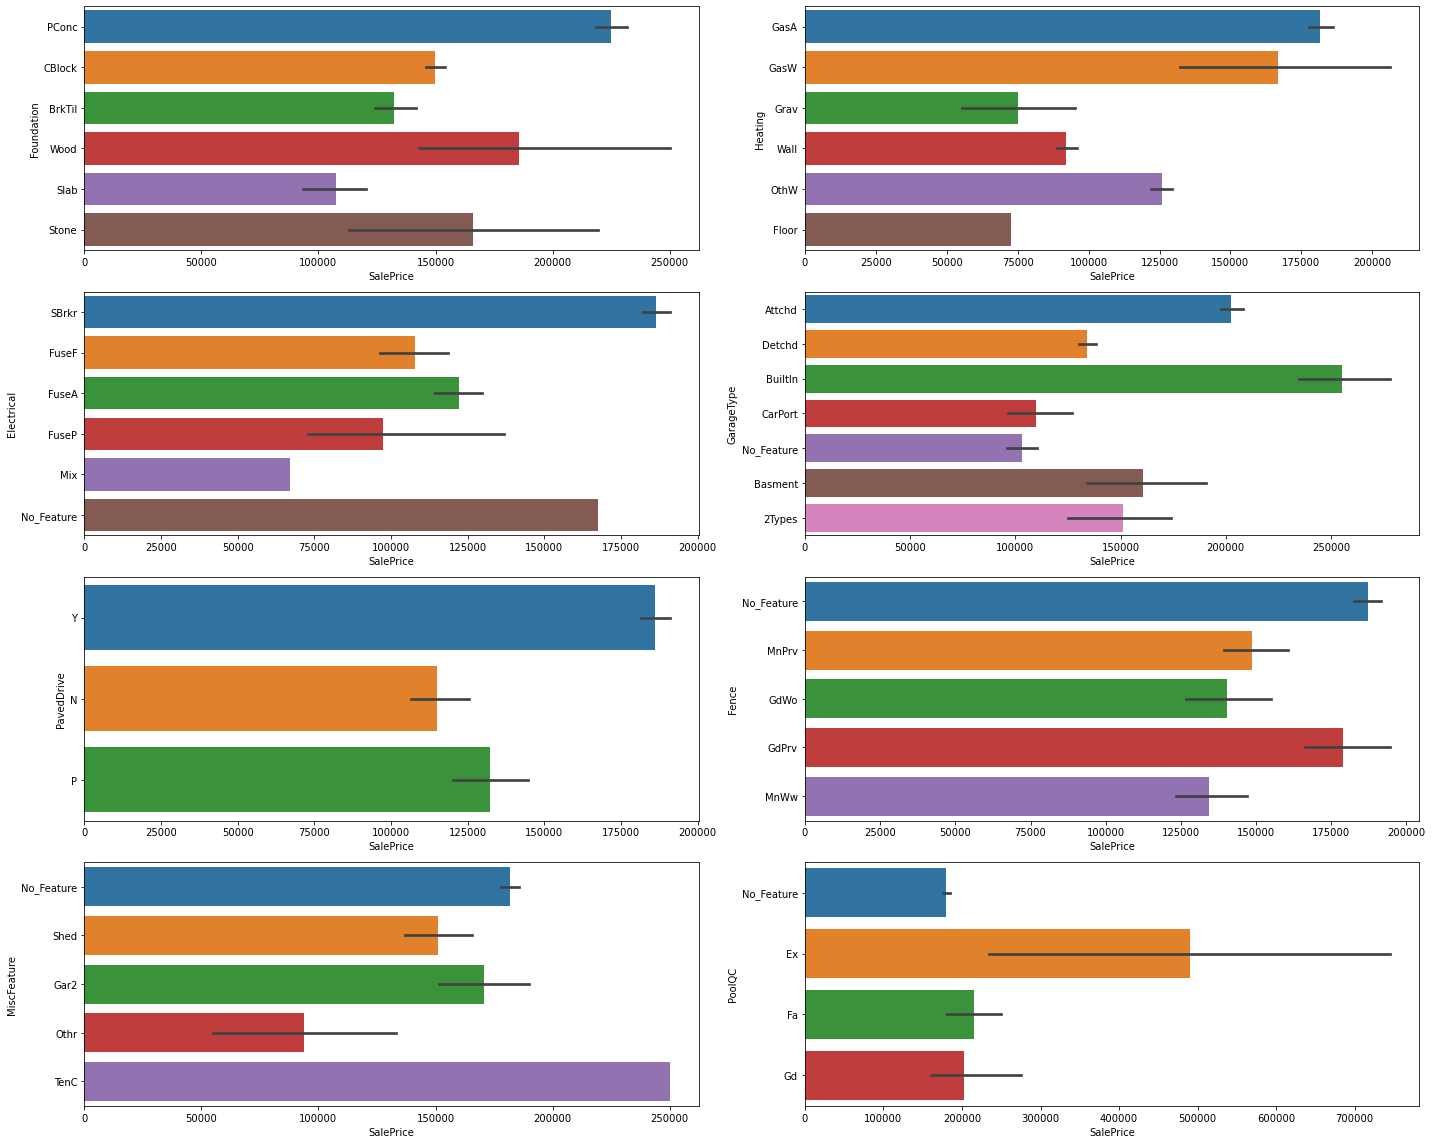

In [45]:
#Plot some Unordered Categories
Plot([ 'Foundation', 'Heating', 'Electrical', 'GarageType','PavedDrive', 'Fence','MiscFeature','PoolQC'])

**Summary:**

- Houses with foundation of poured concrete (Foundation = PConc) and/or Electrical with Standard Circuit Breaker and/or Heating type = GasA have the highest price

- Houses with attached and built-in garage have high SalePrice
- Most of the houses do not have fence (Fence= Not_applicable)

#### Data Preprocessing 

This is most Crucial steps in Model Building 

Here We create the 

    Dummy Variables(Both Ordinal and Nominal),
    Train Test Split 
    Scale The Feature

In [46]:
# dropping 'PoolQC' for very high percentage of missing value and highly imbalance data (if missing value is imputed)
Dataset.drop(['PoolQC'], axis=1, inplace=True)

# dropping rows with null values in 'Electrical', for very low missing value count
Dataset.dropna(subset=['Electrical'], inplace=True)

In [47]:
Dataset

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PavedDrive,WoodDeckSF,OpenPorchSF,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450.0,Pave,No_Feature,Reg,Lvl,AllPub,Inside,...,Y,0,61,No_Feature,No_Feature,2,14,WD,Normal,208500
1,20,RL,80.0,9600.0,Pave,No_Feature,Reg,Lvl,AllPub,FR2,...,Y,298,0,No_Feature,No_Feature,5,15,WD,Normal,181500
2,60,RL,68.0,11250.0,Pave,No_Feature,IR1,Lvl,AllPub,Inside,...,Y,0,42,No_Feature,No_Feature,9,14,WD,Normal,223500
3,70,RL,60.0,9550.0,Pave,No_Feature,IR1,Lvl,AllPub,Corner,...,Y,0,35,No_Feature,No_Feature,2,16,WD,Abnorml,140000
4,60,RL,84.0,14260.0,Pave,No_Feature,IR1,Lvl,AllPub,FR2,...,Y,192,84,No_Feature,No_Feature,12,14,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917.0,Pave,No_Feature,Reg,Lvl,AllPub,Inside,...,Y,0,40,No_Feature,No_Feature,8,15,WD,Normal,175000
1456,20,RL,85.0,13175.0,Pave,No_Feature,Reg,Lvl,AllPub,Inside,...,Y,349,0,MnPrv,No_Feature,2,12,WD,Normal,210000
1457,70,RL,66.0,9042.0,Pave,No_Feature,Reg,Lvl,AllPub,Inside,...,Y,0,60,GdPrv,Shed,5,12,WD,Normal,266500
1458,20,RL,68.0,9717.0,Pave,No_Feature,Reg,Lvl,AllPub,Inside,...,Y,366,0,No_Feature,No_Feature,4,12,WD,Normal,142125


In [48]:
print("Feature : Percentage of Missing Value")
print("=====================================")
for feat in Dataset.columns:
    if Dataset[feat].isnull().any():
        print(feat, ':', round(Dataset[feat].isnull().sum()/Dataset.shape[0], 2)*100)

Feature : Percentage of Missing Value


In [49]:
#Shape
Dataset.shape

(1452, 67)

**Creating Dummy Variables**

We already discussed I mapped Some Of the Ordinal Categories with some Order which is suits for that

In [50]:
#Mapping the ordinal Categories
Dataset['LotShape'] = Dataset['LotShape'].map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})
Dataset['Utilities'] = Dataset['Utilities'].map({'AllPub':3, 'NoSewr':2, 'NoSeWa':1, 'ELO':0})
Dataset['LandSlope'] = Dataset['LandSlope'].map({'Gtl':0,'Mod':1,'Sev':2})
Dataset['HouseStyle'] = Dataset['HouseStyle'].map({'1Story':0, '1.5Unf':1, '1.5Fin':2,  '2Story' :3, '2.5Unf':4, '2.5Fin':5, 'SFoyer':6, 'SLvl':7})
Dataset['ExterQual'] = Dataset['ExterQual'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
Dataset['ExterCond'] = Dataset['ExterCond'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
Dataset['BsmtQual'] = Dataset['BsmtQual'].map({'No_Feature':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
Dataset['BsmtCond'] = Dataset['BsmtCond'].map({'No_Feature':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
Dataset['BsmtExposure'] = Dataset['BsmtExposure'].map({'No_Feature':0,'No':1,'Mn':2,'Av':3,'Gd':4})
Dataset['BsmtFinType1'] = Dataset['BsmtFinType1'].map({'No_Feature':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
Dataset['BsmtFinType2'] = Dataset['BsmtFinType2'].map({'No_Feature':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
Dataset['HeatingQC'] = Dataset['HeatingQC'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
Dataset['CentralAir'] = Dataset['CentralAir'].map({'N':0,'Y':1})
Dataset['KitchenQual'] = Dataset['KitchenQual'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
Dataset['GarageFinish'] = Dataset['GarageFinish'].map({'No_Feature':0,'Unf':1,'RFn':2,'Fin':3})
Dataset['GarageQual'] = Dataset['GarageQual'].map({'No_Feature':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
Dataset['GarageCond'] = Dataset['GarageCond'].map({'No_Feature':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
Dataset['Functional'] = Dataset['Functional'].map({'Typ':0, 'Min1':1, 'Min2':2, 'Mod':3, 'Maj1':4, 'Maj2':5, 'Sev':6, 'Sal':7})
Dataset['FireplaceQu'] = Dataset['FireplaceQu'].map({'No_Feature':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})

In [51]:
#Checking the Data 
Dataset.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PavedDrive,WoodDeckSF,OpenPorchSF,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450.0,Pave,No_Feature,3,Lvl,3,Inside,...,Y,0,61,No_Feature,No_Feature,2,14,WD,Normal,208500
1,20,RL,80.0,9600.0,Pave,No_Feature,3,Lvl,3,FR2,...,Y,298,0,No_Feature,No_Feature,5,15,WD,Normal,181500
2,60,RL,68.0,11250.0,Pave,No_Feature,0,Lvl,3,Inside,...,Y,0,42,No_Feature,No_Feature,9,14,WD,Normal,223500
3,70,RL,60.0,9550.0,Pave,No_Feature,0,Lvl,3,Corner,...,Y,0,35,No_Feature,No_Feature,2,16,WD,Abnorml,140000
4,60,RL,84.0,14260.0,Pave,No_Feature,0,Lvl,3,FR2,...,Y,192,84,No_Feature,No_Feature,12,14,WD,Normal,250000


In [52]:
# Checking the features after encoding

Dataset[['LotShape', 'Utilities', 'LandSlope', 'HouseStyle', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual','Functional','FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1452 entries, 0 to 1459
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   LotShape      1452 non-null   int64
 1   Utilities     1452 non-null   int64
 2   LandSlope     1452 non-null   int64
 3   HouseStyle    1452 non-null   int64
 4   ExterQual     1452 non-null   int64
 5   ExterCond     1452 non-null   int64
 6   BsmtQual      1452 non-null   int64
 7   BsmtCond      1452 non-null   int64
 8   BsmtExposure  1452 non-null   int64
 9   BsmtFinType1  1452 non-null   int64
 10  BsmtFinType2  1452 non-null   int64
 11  HeatingQC     1452 non-null   int64
 12  KitchenQual   1452 non-null   int64
 13  Functional    1452 non-null   int64
 14  FireplaceQu   1452 non-null   int64
 15  GarageFinish  1452 non-null   int64
 16  GarageQual    1452 non-null   int64
 17  GarageCond    1452 non-null   int64
dtypes: int64(18)
memory usage: 215.5 KB


**Creating Dummy Variables on Unordered Categories**

Here We create the Dummy Variables by ONE Not Encoding


Below variables are unorder Categories

In [53]:
unordered_features = ['MSZoning', 'Street', 'Alley', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1' , 'Condition2', 
'BldgType', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'Electrical', 'GarageType','PavedDrive', 'Fence','MiscFeature', 'SaleType','SaleCondition']

In [54]:
#Creating the dummies
dummies = pd.get_dummies(Dataset[unordered_features], drop_first=True)

In [55]:
dummies.shape

(1452, 145)

In [56]:
dummies_to_drop = []
for feat in dummies.columns:
    if dummies[feat].value_counts()[0]/dummies.shape[0] >= 0.95:
        dummies_to_drop.append(feat)
        
print(dummies_to_drop)
print(len(dummies_to_drop))

['MSZoning_FV', 'MSZoning_RH', 'Alley_Pave', 'LandContour_HLS', 'LandContour_Low', 'LotConfig_FR2', 'LotConfig_FR3', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NPkVill', 'Neighborhood_NoRidge', 'Neighborhood_SWISU', 'Neighborhood_SawyerW', 'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker', 'Condition1_PosA', 'Condition1_PosN', 'Condition1_RRAe', 'Condition1_RRAn', 'Condition1_RRNe', 'Condition1_RRNn', 'Condition2_Feedr', 'Condition2_PosA', 'Condition2_PosN', 'Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn', 'BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_Twnhs', 'RoofStyle_Gambrel', 'RoofStyle_Mansard', 'RoofStyle_Shed', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace',

In [57]:
# Dropping the highly imbalanced dummy variables

dummies = dummies.drop(dummies_to_drop, axis=1)


In [58]:
#Again Checking the Shape
Dataset.shape

(1452, 67)

In [59]:
# Adding the dummy variables to the original dataframe
Dataset = pd.concat([Dataset,dummies],axis=1)

# Dropping the redundant columns
Dataset = Dataset.drop(unordered_features,axis=1)

In [60]:
Dataset.shape

(1452, 96)

##### Splitting into Train and Test Data

Split the data set in two parts train and test,
    train which is used for train the model 
    test which is used for checking the created Model 

Spliting the Dataset into X and Y which mean that X is Feature Variable And Y is Target Variables

In [61]:
#Dropping the Target Variable from Main Dataset
X = Dataset.drop(['SalePrice'], axis=1)
X.head()

,MSSubClass,LotFrontage,LotArea,LotShape,Utilities,LandSlope,HouseStyle,OverallQual,OverallCond,YearBuilt,...,GarageType_Detchd,GarageType_No_Feature,PavedDrive_Y,Fence_MnPrv,Fence_No_Feature,MiscFeature_No_Feature,SaleType_New,SaleType_WD,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450.0,3,3,0,3,7,5.0,19,...,0,0,1,0,1,1,0,1,1,0
1,20,80.0,9600.0,3,3,0,0,6,7.5,46,...,0,0,1,0,1,1,0,1,1,0
2,60,68.0,11250.0,0,3,0,3,7,5.0,21,...,0,0,1,0,1,1,0,1,1,0
3,70,60.0,9550.0,0,3,0,3,7,5.0,107,...,1,0,1,0,1,1,0,1,0,0
4,60,84.0,14260.0,0,3,0,3,8,5.0,22,...,0,0,1,0,1,1,0,1,1,0


While we checking the Outliers in cleaning section we clearly found that there is huge Outliers In Dataset

Checking and fixing the outliers is important 

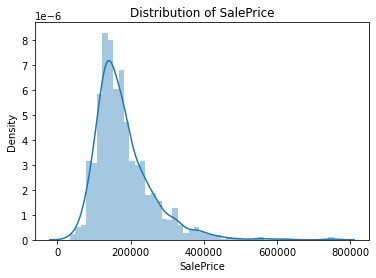

In [62]:
# Checking the distribution of target variable, SalePrice

plt.title('Distribution of SalePrice')
sb.distplot(Dataset['SalePrice'])
plt.show()

In [63]:
# log transformed SalePrice is normally distributed, hence transformed data will be used for model building

y = np.log(Dataset['SalePrice'])
#print(y)

In [64]:
#y=housing_df['SalePrice']

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [66]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1016, 95)
(436, 95)
(1016,)
(436,)


In [67]:
#X['LotFrontage'].isnull().any()

In [68]:
#si = SimpleImputer(missing_values=np.nan, strategy='mean')
#si.fit(X_train[['LotFrontage']])
#X_train['LotFrontage']=X_train['LotFrontage'].fillna(X_train['LotFrontage'].median())

In [69]:
#X_train[['LotFrontage']] = si.transform(X_train[['LotFrontage']])
#X_test['LotFrontage']=X_test['LotFrontage'].fillna(X_test['LotFrontage'].median())

In [70]:
#X_test[['LotFrontage']] = si.transform(X_test[['LotFrontage']])

In [71]:
#Checking X_Train Value
X_train.values

array([[2.000e+01, 1.075e+02, 1.423e+04, ..., 1.000e+00, 1.000e+00,
        0.000e+00],
       [5.000e+01, 1.050e+02, 8.470e+03, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [5.000e+01, 5.900e+01, 5.310e+03, ..., 1.000e+00, 1.000e+00,
        0.000e+00],
       ...,
       [1.200e+02, 6.900e+01, 5.271e+03, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       [5.000e+01, 6.000e+01, 1.044e+04, ..., 1.000e+00, 1.000e+00,
        0.000e+00],
       [6.000e+01, 7.000e+01, 8.400e+03, ..., 1.000e+00, 1.000e+00,
        0.000e+00]])

#### Scaling the Features 

Scaling the Numerical Values into one scale will help the Gradiant Decent Performs Better

Here I'm going to use StandardScaler() function for scalling my features 

In [72]:
#Scaling the columns
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [73]:
#Fit in our Dataset
XTrainScaled=pd.DataFrame(data=scaler.transform(X_train), columns=X_train.columns)
XTestScaled=pd.DataFrame(data=scaler.transform(X_test), columns=X_train.columns)

In [74]:
#X_tr_scaled = pd.DataFrame(data=ss.transform(X_train), columns=X_train.columns)
#X_te_scaled = pd.DataFrame(data=ss.transform(X_test), columns=X_test.columns)
print(XTrainScaled,XTestScaled)

      MSSubClass  LotFrontage   LotArea  LotShape  Utilities  LandSlope  \
0      -0.945760     2.218992  1.286427  0.729819   0.031388  -0.218149   
1      -0.151962     2.075073 -0.309563 -1.421524   0.031388  -0.218149   
2      -0.151962    -0.573043 -1.185141  0.729819   0.031388  -0.218149   
3      -0.945760    -0.342772 -0.301250  0.729819   0.031388  -0.218149   
4       0.112637     0.002635 -0.422335  0.729819   0.031388  -0.218149   
...          ...          ...       ...       ...        ...        ...   
1011   -0.945760     1.269125  0.744456 -1.421524   0.031388  -0.218149   
1012   -0.945760    -0.054933  2.245649 -1.421524   0.031388  -0.218149   
1013    1.700233     0.002635 -1.195947 -1.421524   0.031388   3.475835   
1014   -0.151962    -0.515475  0.236288  0.729819   0.031388  -0.218149   
1015    0.112637     0.060202 -0.328959  0.729819   0.031388  -0.218149   

      HouseStyle  OverallQual  OverallCond  YearBuilt  ...  GarageType_Detchd  \
0      -0.858170  

In [75]:
# Checking the features after 

#print(X_tr_scaled) # train data
#print(X_te_scaled) # test data

Finally Every Preprocessing is Done Noe I fall into selecting the Feature,Here I'm Going to use RFE for Selecting Feature because The Number of columns is high here

#### RFE

Here I use RFE For Selecting columns

In [76]:
# Given the number of features = n, the functions prints and returns top n features selected by RFE

def top_n_features(n):
    top_n_cols = []
    
    linear_m = LinearRegression()
    linear_m.fit(XTrainScaled, y_train)
    rfe = RFE(linear_m, n)
    rfe = rfe.fit(XTrainScaled, y_train)
    
    print("Top %d features : " %n)
    rfe_ranking = list(zip(XTrainScaled.columns,rfe.support_,rfe.ranking_))
    
    for i in rfe_ranking:
        if i[1]:
            top_n_cols.append(i[0])
    print(top_n_cols)
    return top_n_cols

In [77]:
#Dataset["FireplaceQu"].isnull().sum()

#

Here I'm Going to Try different number of RFE Values ie Different Number of Feature

In [78]:
# Checking top 45, 50 and 55 features
top_45 = top_n_features(45)
top_50 = top_n_features(50)
top_55 = top_n_features(55)
top_100 = top_n_features(100)

Top 45 features : 
['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtExposure', 'BsmtFinSF1', 'BsmtUnfSF', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'BsmtFullBath', 'HalfBath', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageFinish', 'GarageArea', 'GarageQual', 'MSZoning_RL', 'LotConfig_CulDSac', 'Neighborhood_Edwards', 'Neighborhood_NAmes', 'Neighborhood_NWAmes', 'Neighborhood_NridgHt', 'Neighborhood_Sawyer', 'Neighborhood_Somerst', 'Condition1_Norm', 'Condition2_Norm', 'BldgType_TwnhsE', 'Exterior1st_HdBoard', 'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng', 'Exterior2nd_VinylSd', 'Foundation_PConc', 'GarageType_Attchd', 'GarageType_Detchd', 'GarageType_No_Feature', 'PavedDrive_Y', 'SaleType_New', 'SaleCondition_Normal', 'SaleCondition_Partial']
Top 50 features : 
['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtUnfSF'

## Model Building 


After perform lot of Pre Process finally we come to the Model Building Part,

Here First I build the Model with Linearregression with different RFE Value

Later I fit the Lasso and Ridge Regression for different Lambda value

#### Linear Regression

First Step is Build Linear Regression Model on RFE Value We Get

In [79]:
# Given the training data and list of features, this will provide the statistical summary of the model
# This will be used to check adjusted R-square value for top 45, 50 and 55 features

def build_regressor(X_train,y_train,cols):
    X_train_ols = sm.add_constant(X_train[cols])
    lin_reg = sm.OLS(y_train.values.reshape(-1,1), X_train_ols).fit()
    print(lin_reg.summary())    

In [80]:
build_regressor(XTrainScaled,y_train,top_45)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     224.3
Date:                Wed, 09 Mar 2022   Prob (F-statistic):               0.00
Time:                        23:02:13   Log-Likelihood:                 746.41
No. Observations:                1016   AIC:                            -1401.
Df Residuals:                     970   BIC:                            -1174.
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    12.02

In [81]:
build_regressor(XTrainScaled,y_train,top_50)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     205.0
Date:                Wed, 09 Mar 2022   Prob (F-statistic):               0.00
Time:                        23:02:13   Log-Likelihood:                 755.91
No. Observations:                1016   AIC:                            -1410.
Df Residuals:                     965   BIC:                            -1159.
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    12.02

In [82]:
build_regressor(XTrainScaled,y_train,top_55)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     191.1
Date:                Wed, 09 Mar 2022   Prob (F-statistic):               0.00
Time:                        23:02:14   Log-Likelihood:                 760.97
No. Observations:                1016   AIC:                            -1412.
Df Residuals:                     961   BIC:                            -1141.
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    12.02

In [83]:
build_regressor(XTrainScaled,y_train,top_100)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     109.3
Date:                Wed, 09 Mar 2022   Prob (F-statistic):               0.00
Time:                        23:02:14   Log-Likelihood:                 778.70
No. Observations:                1016   AIC:                            -1367.
Df Residuals:                     921   BIC:                            -899.7
Df Model:                          94                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     12

**Summary** 

By checking Different RFE Value Finally i Endup with the 50 because,If we see the R2 Value of both 50 and 55 More or less Same,So I go for 50,We can go to the 100 RFE But the 50 and 100 adjusted R2 value is same So i Finalized RFE 50

In [84]:
X_train_rfe = XTrainScaled[top_50]
X_test_rfe = XTestScaled[top_50]

#### Build Model on Ridge and lasso regression

This is final step of Model Building, Here we Optimze the Linear Regression With Different Lambdas in Ridge And Lasso Regression 

**Create Different K fold for try different Lambda on both lasso and ridge**

In [85]:
# Reusable Code Block for Cross-validation, Model Building and Model Evaluation

def build_model(X_train, y_train, X_test, params, model='ridge'):
        if model == 'ridge':
          estimator_model = Ridge()
        else:
          estimator_model = Lasso()
        model_cv = GridSearchCV(estimator = estimator_model, 
                                param_grid = params, 
                                scoring= 'neg_mean_absolute_error', 
                                cv = 5, 
                                return_train_score=True,
                                verbose = 1)            
        model_cv.fit(X_train, y_train)
        alpha = model_cv.best_params_["alpha"]
        print("Optimum alpha for %s is %f" %(model, alpha))
        final_model = model_cv.best_estimator_

        final_model.fit(X_train, y_train)
        y_train_pred = final_model.predict(X_train)
        y_test_pred = final_model.predict(X_test)
 
       # Model Evaluation
        print(model," Regression with ",alpha)
        print("===================================")
        print('R2 score (train) : ',r2_score(y_train,y_train_pred))
        print('R2 score (test) : ',r2_score(y_test,y_test_pred))
        print('RMSE (train) : ', np.sqrt(mean_squared_error(y_train, y_train_pred)))
        print('RMSE (test) : ', np.sqrt(mean_squared_error(y_test, y_test_pred)))

        return final_model, y_test_pred

**Ridge Regression**

In [86]:
parameters = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge_final_model, y_test_predicted = build_model(X_train_rfe, y_train, X_test_rfe, parameters, model='ridge')

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Optimum alpha for ridge is 10.000000
ridge  Regression with  10.0
R2 score (train) :  0.9136672341521263
R2 score (test) :  0.8917121671352861
RMSE (train) :  0.11517486054214349
RMSE (test) :  0.13676364734434512


**Fitting Lasso regression**

In [87]:
params = {'alpha': [0.000001, 0.00001,0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 500, 1000, 10000]}

lasso_final_model, y_test_predicted = build_model(X_train_rfe, y_train, X_test_rfe, params, model='lasso')

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Optimum alpha for lasso is 0.001000
lasso  Regression with  0.001
R2 score (train) :  0.9124710628019927
R2 score (test) :  0.8948549391422506
RMSE (train) :  0.11597001019042258
RMSE (test) :  0.13476443089321966


We successfully create both ridge and Lasso Model Here We Create the Coefficient we get from Both Model

**Comparing The Coefficient**

In [88]:
model_coefficients = pd.DataFrame(index=X_test_rfe.columns)
model_coefficients.rows = X_test_rfe.columns

model_coefficients['Ridge (alpha=9.0)'] = ridge_final_model.coef_
model_coefficients['Lasso (alpha=0.0001)'] = lasso_final_model.coef_
pd.set_option('display.max_rows', None)
model_coefficients

,Ridge (alpha=9.0),Lasso (alpha=0.0001)
MSSubClass,-0.011661,-0.008571
LotFrontage,0.012396,0.010040
LotArea,0.033427,0.031834
OverallQual,0.079905,0.083460
OverallCond,0.048175,0.046879
YearBuilt,-0.034869,-0.036322
YearRemodAdd,-0.014089,-0.014019
BsmtExposure,0.014686,0.013437
BsmtFinSF1,0.049503,0.048072
BsmtFinType2,0.007958,0.007319


In [89]:
# Converting the predictions to its original scale (anti log)

test_prediction = np.round(np.exp(y_test_predicted)).astype(int)
print(test_prediction[:5])

[247808 220356 114313 160007 112413]


**Final Model**

Here Both model Performs exactly same but here I go for Lasso instead of Ridge because explanablity in lasso is better than Ridge

In [90]:
# 50 features ordered by feature importance in Lasso Regression

model_coefficients[['Lasso (alpha=0.0001)']].sort_values(by='Lasso (alpha=0.0001)', ascending=False)

,Lasso (alpha=0.0001)
1stFlrSF,0.111633
2ndFlrSF,0.104775
OverallQual,0.083460
BsmtFinSF1,0.048072
OverallCond,0.046879
LotArea,0.031834
SaleType_New,0.024840
BsmtUnfSF,0.024747
BsmtFullBath,0.024223
Neighborhood_Somerst,0.022808


At Final We come To the conclusion For Predicting the SalePrice Below variables are Contributing Much

The Variables Are

In [91]:
model_coefficients[['Lasso (alpha=0.0001)']].sort_values(by='Lasso (alpha=0.0001)', ascending=False).index[:10]

Index(['1stFlrSF', '2ndFlrSF', 'OverallQual', 'BsmtFinSF1', 'OverallCond',
       'LotArea', 'SaleType_New', 'BsmtUnfSF', 'BsmtFullBath',
       'Neighborhood_Somerst'],
      dtype='object')

Those Variables are as Follows:

    1stFlrSF'
    '2ndFlrSF'
    'OverallQual'
    'BsmtFinSF1',
    'OverallCond',
    'LotArea'
    'BsmtFullBath'
    'SaleType_New',
    'BsmtUnfSF',
    'MSZoning_RL

### Final Conclusion:

Reading and Understanding the Variables

Target Price is salePrice

While perform Initial Steps we found some outliers,some missing Value later a period we handled it with some Technique

In Data Preparation part We split the Datas into Test and Train,Scaled Feature, and Created Dummy Variables on both Ordinal and Nominal

Later We selct RFE for selecting the Model with different threshold

Later I Fitted the Linear regresion and  select which one is best Finally,We end up with 50 as Final

After fitting the Linear Regression, I optimeze those model with both Ridge and Lasso with different Lambdas

Finally we got some of important variables are

    1stFlrSF'
    '2ndFlrSF'
    'OverallQual'
    'BsmtFinSF1',
    'OverallCond',
    'LotArea'
    'BsmtFullBath'
    'SaleType_New',
    'BsmtUnfSF',
    'MSZoning_RL



# Subjective Question

Question :1

    What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

In [92]:
# Model Building
ridge_model = Ridge(alpha=18.0)
ridge_model.fit(X_train_rfe, y_train)

# Predicting
y_train_pred = ridge_model.predict(X_train_rfe)
y_test_pred = ridge_model.predict(X_test_rfe)

print("Model Evaluation : Ridge Regression, alpha=18.0")
print('R2 score (train) : ',round(r2_score(y_train,y_train_pred), 4))
print('R2 score (test) : ',round(r2_score(y_test,y_test_pred), 4))
print('RMSE (train) : ', round(np.sqrt(mean_squared_error(y_train, y_train_pred)), 4))
print('RMSE (test) : ', round(np.sqrt(mean_squared_error(y_test, y_test_pred)), 4))

Model Evaluation : Ridge Regression, alpha=18.0
R2 score (train) :  0.9133
R2 score (test) :  0.8918
RMSE (train) :  0.1154
RMSE (test) :  0.1367


In [93]:
lasso_model = Lasso(alpha=0.0002)
lasso_model.fit(X_train_rfe, y_train)
y_train_pred = lasso_model.predict(X_train_rfe)
y_test_pred = lasso_model.predict(X_test_rfe)

print("Model Evaluation : Lasso Regression, alpha=0.0002")
print('R2 score (train) : ',round(r2_score(y_train,y_train_pred), 4))
print('R2 score (test) : ',round(r2_score(y_test,y_test_pred), 4))
print('RMSE (train) : ', round(np.sqrt(mean_squared_error(y_train, y_train_pred)), 4))
print('RMSE (test) : ', round(np.sqrt(mean_squared_error(y_test, y_test_pred)), 4))

Model Evaluation : Lasso Regression, alpha=0.0002
R2 score (train) :  0.9139
R2 score (test) :  0.892
RMSE (train) :  0.1151
RMSE (test) :  0.1366


In [94]:
model_coefficients['Ridge (alpha = 18.0)'] = ridge_model.coef_
model_coefficients['Lasso (alpha = 0.0002)'] = lasso_model.coef_
pd.set_option('display.max_rows', None)
model_coefficients

,Ridge (alpha=9.0),Lasso (alpha=0.0001),Ridge (alpha = 18.0),Lasso (alpha = 0.0002)
MSSubClass,-0.011661,-0.008571,-0.010957,-0.011847
LotFrontage,0.012396,0.010040,0.012641,0.011596
LotArea,0.033427,0.031834,0.033401,0.033196
OverallQual,0.079905,0.083460,0.079999,0.080197
OverallCond,0.048175,0.046879,0.047136,0.049136
YearBuilt,-0.034869,-0.036322,-0.033172,-0.037313
YearRemodAdd,-0.014089,-0.014019,-0.014716,-0.013380
BsmtExposure,0.014686,0.013437,0.014500,0.014710
BsmtFinSF1,0.049503,0.048072,0.049470,0.049080
BsmtFinType2,0.007958,0.007319,0.007981,0.007742


In [95]:
model_coefficients.sort_values(by='Lasso (alpha = 0.0002)', ascending=False).head(1)

,Ridge (alpha=9.0),Lasso (alpha=0.0001),Ridge (alpha = 18.0),Lasso (alpha = 0.0002)
1stFlrSF,0.104704,0.111633,0.100796,0.110756


In [96]:
model_coefficients.sort_values(by='Ridge (alpha = 18.0)', ascending=False).head(1)

,Ridge (alpha=9.0),Lasso (alpha=0.0001),Ridge (alpha = 18.0),Lasso (alpha = 0.0002)
1stFlrSF,0.104704,0.111633,0.100796,0.110756


In [97]:
model_coefficients.sort_values(by='Lasso (alpha=0.0001)', ascending=False).head(5)

,Ridge (alpha=9.0),Lasso (alpha=0.0001),Ridge (alpha = 18.0),Lasso (alpha = 0.0002)
1stFlrSF,0.104704,0.111633,0.100796,0.110756
2ndFlrSF,0.100888,0.104775,0.096151,0.107350
OverallQual,0.079905,0.083460,0.079999,0.080197
BsmtFinSF1,0.049503,0.048072,0.049470,0.049080
OverallCond,0.048175,0.046879,0.047136,0.049136


Question 3

After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

 

In [98]:
X_train_new = X_train_rfe.drop(['1stFlrSF', '2ndFlrSF', 'OverallQual', 'OverallCond', 'SaleCondition_Partial'], axis=1)

In [99]:
X_test_new = X_test_rfe.drop(['1stFlrSF', '2ndFlrSF', 'OverallQual', 'OverallCond', 'SaleCondition_Partial'], axis=1)

In [100]:
alpha = 0.0001
lasso_model = Lasso(alpha=alpha)
lasso_model.fit(X_train_new, y_train)
y_train_pred = lasso_model.predict(X_train_new)
y_test_pred = lasso_model.predict(X_test_new)

In [101]:
lasso_model.coef_

array([ 0.0019598 ,  0.01890971,  0.04348   ,  0.00133441, -0.04461311,
        0.01556726,  0.0917982 ,  0.01655862,  0.06809928,  0.01839043,
        0.01654203,  0.03492305,  0.04631813,  0.0885901 , -0.02784171,
        0.0423274 ,  0.01918278,  0.04615004,  0.04770259,  0.0150978 ,
        0.01537747,  0.01581914,  0.01657889, -0.01938835, -0.01526116,
       -0.0072967 ,  0.01560269, -0.00741716, -0.02081432,  0.02434949,
        0.01685661,  0.01207484,  0.01339448, -0.01683068, -0.00864873,
        0.02316495, -0.01089304, -0.03484388,  0.02662826,  0.00776496,
        0.0043885 ,  0.04346389,  0.014834  ,  0.0214192 ,  0.02163391])

In [102]:
model_coeff = pd.DataFrame(index=X_test_new.columns)
model_coeff.rows = X_test_new.columns
model_coeff['Lasso'] = lasso_model.coef_
model_coeff.sort_values(by='Lasso', ascending=False).head(5)

,Lasso
BsmtFinSF1,0.091798
TotRmsAbvGrd,0.088590
BsmtUnfSF,0.068099
GarageQual,0.047703
KitchenQual,0.046318
